<a href="https://colab.research.google.com/github/filipeclduarte/minicurso_simpat_am_2021/blob/main/am_atuaria_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minicurso de Aprendizagem de Máquina aplicada à Atuária com Python

Minicurso apresentado no SIMPAT 2021

**Objetivo**: Apresentar pipeline da modelagem com Aprendizagem de Máquina em Python.

Exemplo: Prever se um segurado incorrerá em sinistro em um seguro de viagem.

Base de dados: https://www.kaggle.com/mhdzahier/travel-insurance



## Introdução


Machine Learning workflow

1. [Carregando bibliotecas](#carregando_bibliotecas)
2. [Conhecendo os dados](#conhecendo_dados)
4. [Estatística descritiva](#estat_descritiva)
5. [Pré-processamento](#pre_process)
6. [Modelos](#modelos)
7. [Grid Search](#grid)

## Carregando bibliotecas

In [1]:
# bibliotecas de análise de dados e gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para pré-processamento e machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 100) 

np.random.seed(0)

## Carregando os dados


In [2]:
def ler_dados():
    # download dos dados
    import urllib.request
    url = "https://github.com/filipeclduarte/minicurso_simpat_am_2021/raw/main/travel_insurance.zip"
    print('Iniciando o download dos dados...')
    urllib.request.urlretrieve(url, 'travel_insurance.zip')
    print('Download finalizado.')

    # extração dos dados .zip
    print('Iniciando extração do arquivo...')
    import zipfile
    zf = zipfile.ZipFile('travel_insurance.zip') 
    print('Finalização da extração.')

    # ler arquivo .csv no formato DataFrame com pandas
    print('Lendo os dados .csv em pandas.DataFrame')
    df = pd.read_csv(zf.open('travel insurance.csv')) # a coluna id será index
    
    return df

In [3]:
# realizando a leitura dos dados
df = ler_dados()

Iniciando o download dos dados...
Download finalizado.
Iniciando extração do arquivo...
Finalização da extração.
Lendo os dados .csv em pandas.DataFrame


In [4]:
# visualizando os dados
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [5]:
# Sem pré-processamento
df2 = df.copy()

## Conhecendo os dados

Algumas informações sobre os dados:

* Target: Claim (Yes/No)
* Gender possui valores NaN

Precisamos realizar pré-processamento

In [6]:
# 5 primeiras linhas
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [7]:
# visualizando a estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


5 últimas linhas dos dados

In [8]:
df.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35



A partir desses dados, vemos:
* variáveis binárias
* variáveis categóricas
* variáveis restantes como valores reais (float) ou inteiros

Visualizando a quantidade de linhas e colunas dos dados.

In [9]:
df.shape

(63326, 11)

Temos 11 colunas e 63326 linhas. 

Vamos analisar abaixo se há duplicação de linhas.



In [10]:
df = df.drop_duplicates()
df.shape

(55284, 11)

## Estatística descritiva e análise exploratória

O método `describe` apresenta as estatísticas descritivas para todas as colunas do data frame. Contudo, só fará sentido aplicá-la nas variáveis numéricas. 

#### Criando vetores com os nome das variáveis pelos grupos (reg, cat)

In [11]:
# salvando nomes das colunas
colunas = df.columns

# salvando colunas a partir do tipo
colunas_reg = [col for col in colunas if df[col].dtype == 'float64']
colunas_cat = [col for col in colunas if df[col].dtype == 'object']

# mostrando as categóricas
print(colunas_cat)

['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']


In [12]:
df[colunas_reg].describe()

,Net Sales,Commision (in value)
count,55284.000000,55284.000000
mean,42.788716,10.680707
std,50.448570,20.676708
min,-389.000000,0.000000
25%,19.167500,0.000000
50%,29.000000,0.000000
75%,50.500000,11.880000
max,810.000000,283.500000



* Vamos visualizar graficamente a distribuição de Net Sales.

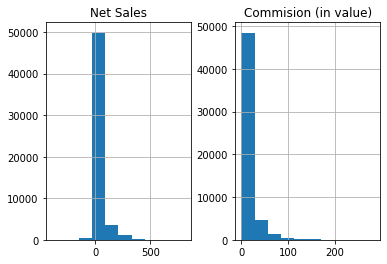

In [13]:
df[['Net Sales', 'Commision (in value)']].hist();

É provável que os valores negativos sejam outliers. Dependendo da correlação dessa variável com Commision, iremos removê-la.

#### variáveis 'cat'

In [14]:
df[colunas_cat].describe()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
count,55284,55284,55284,55284,55284,55284,16959
unique,16,2,2,26,2,149,2
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE,M
freq,28956,39098,54232,15308,54363,11539,8558


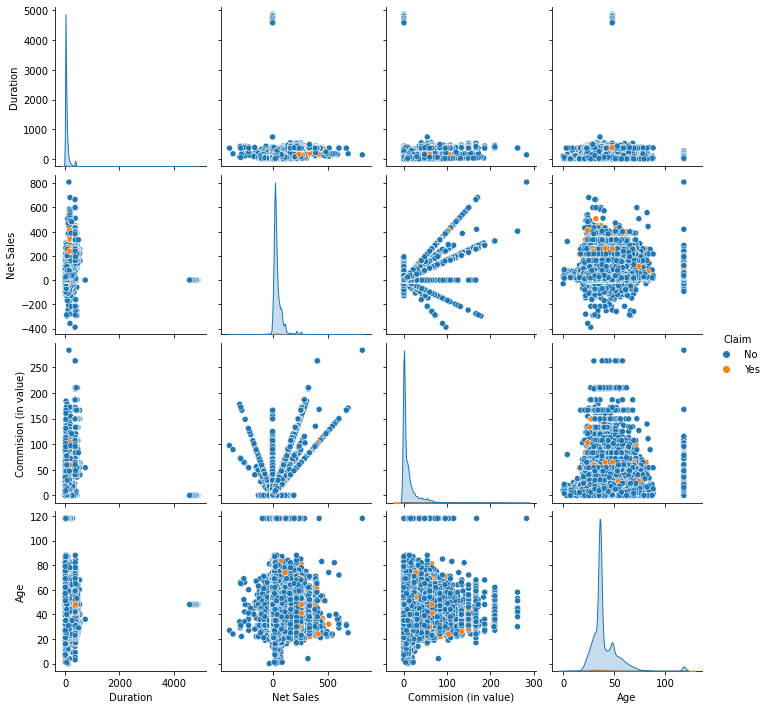

In [15]:
# análise entre exploratória entre variáveis
sns.pairplot(df, hue="Claim");
plt.show()



### Variáveis contínuas - Correlação

In [16]:
continuas = colunas_reg
correlacao = df[colunas_reg].corr()    
correlacao

,Net Sales,Commision (in value)
Net Sales,1.0000,0.6431
Commision (in value),0.6431,1.0000


* Correlacção positiva entre Net Sales e Comission (in value).

Vamos remover Comission (in value) e as observações com valores negativos (possivelmente outliers de Net Sales).

## Pré-processamento

É importante transformar as variáveis categóricas em códigos. 

In [17]:
## Encoding a variável Claim
df.loc[df['Claim'] == 'Yes', 'Claim'] = 1
df.loc[df['Claim'] == 'No', 'Claim'] = 0
df['Claim'] = df['Claim'].astype('int32')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
## 2
df2.loc[df2['Claim'] == 'Yes', 'Claim'] = 1
df2.loc[df2['Claim'] == 'No', 'Claim'] = 0
df2['Claim'] = df2['Claim'].astype('int32')

In [19]:
# Filtrar Net Sales > 0
df = df[df['Net Sales'] > 0]

In [20]:
# Excluindo variáveis com muitos dados omissos
# var_remover = ['Gender', 'Commision (in value)']
var_remover = ['Gender', 'Net Sales']
df.drop(var_remover, inplace=True, axis=1)

In [21]:
## 2
df2.drop(var_remover, inplace=True, axis=1)

### Qual a proporção de segurados com sinistros (priori).

In [22]:
qtd_sinistros = (df['Claim'].values == 1).sum()
proporção = qtd_sinistros/df.shape[0]
print('Qual a probabilidade a priori de um segurado sinistrar: {:.4f}'. format(proporção))

Qual a probabilidade a priori de um segurado sinistrar: 0.0174


In [23]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,0,12,SINGAPORE,11.54,44
22,C2B,Airlines,Online,Bronze Plan,0,7,SINGAPORE,4.39,25
23,C2B,Airlines,Online,Bronze Plan,1,12,SINGAPORE,23.50,34
24,C2B,Airlines,Online,Silver Plan,0,190,SINGAPORE,73.69,26
25,C2B,Airlines,Online,Annual Silver Plan,0,364,SINGAPORE,97.25,30
...,...,...,...,...,...,...,...,...,...
63320,JZI,Airlines,Online,Basic Plan,0,5,BRUNEI DARUSSALAM,6.30,27
63321,JZI,Airlines,Online,Basic Plan,0,111,JAPAN,12.25,31
63322,JZI,Airlines,Online,Basic Plan,0,58,CHINA,14.00,40
63323,JZI,Airlines,Online,Basic Plan,0,2,MALAYSIA,6.30,57


### Variável duration

Nós temos valores negativos na duração. É possível? Sim, pois é decorrente da diferença de fuso horário. Viajar do lesta para oeste.

Vamos categorizar os valores negativos.

In [24]:
df['Duration'].describe()

count    52829.000000
mean        52.426565
std        107.622254
min         -2.000000
25%         11.000000
50%         25.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

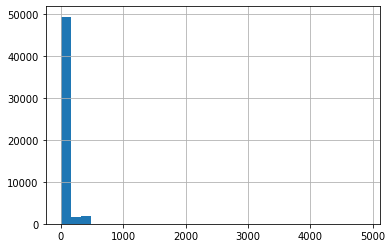

In [25]:
df['Duration'].hist(bins=30);

In [26]:
df[df['Duration'] < 0.0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Commision (in value),Age
14943,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,7.7,118
52587,JZI,Airlines,Online,Basic Plan,0,-1,MALAYSIA,6.3,118
52588,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,6.3,118
56668,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,6.3,118
59528,JZI,Airlines,Online,Basic Plan,0,-1,CHINA,7.7,118


Apenas 5 valores


### Variáveis Destination

In [27]:
dest=df['Destination'].value_counts()
dest

SINGAPORE                 11260
THAILAND                   4974
MALAYSIA                   4127
CHINA                      3875
AUSTRALIA                  3084
                          ...  
REUNION                       1
REPUBLIC OF MONTENEGRO        1
SOLOMON ISLANDS               1
BENIN                         1
RWANDA                        1
Name: Destination, Length: 147, dtype: int64

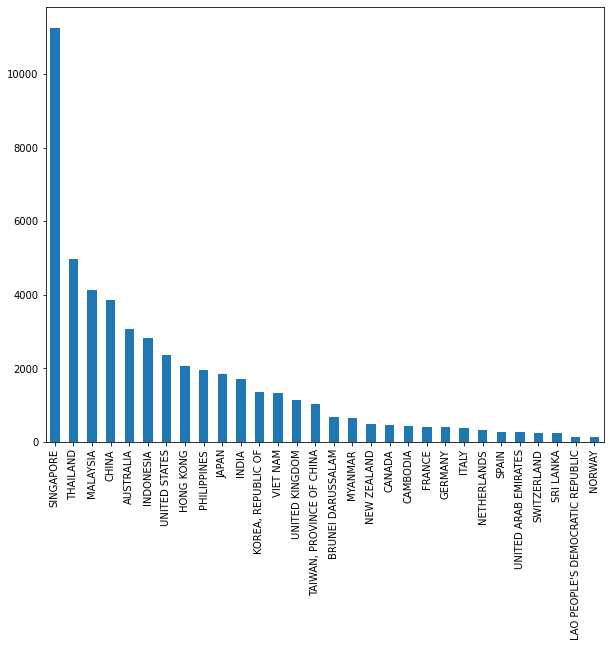

In [28]:
plt.figure(figsize=(10, 8))
dest.iloc[:30].plot(kind='bar');

Temos muitos destinos. Vamos considerar os 15 destinos mais visitados e o restante será considerado como outros.

In [29]:
dest=dict(dest[:15])
dest=dest.keys()
df.loc[~df.Destination.isin(dest), 'Destination'] = 'Others'
dest=df['Destination'].value_counts()
print(dest)

SINGAPORE                    11260
Others                        7895
THAILAND                      4974
MALAYSIA                      4127
CHINA                         3875
AUSTRALIA                     3084
INDONESIA                     2819
UNITED STATES                 2357
HONG KONG                     2066
PHILIPPINES                   1965
JAPAN                         1839
INDIA                         1704
KOREA, REPUBLIC OF            1355
VIET NAM                      1328
UNITED KINGDOM                1152
TAIWAN, PROVINCE OF CHINA     1029
Name: Destination, dtype: int64


### Realizando one-hot-encoding nas variáveis categóricas

Para as variáveis que possuem mais de 2 categorias, realizamos o processo de one-hot-encoding que é a criação de atributos (variáveis) para cada categoria da variável. Essas variáveis serão binárias, assumindo o valor 1 quando da presença da categoria, e 0, na ausência.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52829 entries, 21 to 63325
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                52829 non-null  object 
 1   Agency Type           52829 non-null  object 
 2   Distribution Channel  52829 non-null  object 
 3   Product Name          52829 non-null  object 
 4   Claim                 52829 non-null  int32  
 5   Duration              52829 non-null  int64  
 6   Destination           52829 non-null  object 
 7   Commision (in value)  52829 non-null  float64
 8   Age                   52829 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 3.8+ MB


In [31]:
# função get_dummies transforma as categorias em variáveis binárias
df_onehot = df.copy()
# df_onehot = pd.get_dummies(df_onehot, columns=['Agency Type','Distribution Channel'])
df_onehot = pd.get_dummies(df_onehot)
print(df_onehot.shape)

(52829, 65)


In [32]:
## 2.
df_onehot2 = pd.get_dummies(df2)
print(df_onehot2.shape)

(63326, 199)


## Separação dos dados em treinamento e teste

Vamos considerar 70% de treinamento, 30% de teste

In [33]:
# antes vamos separar X (features) e y (target)
X, y = df_onehot.drop(columns='Claim'), df['Claim']
## 2. 
# X, y = df_onehot2.drop(columns='Claim'), df2['Claim']

# separar em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [34]:
# verificando
print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)

print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (36980, 64)
y_train.shape: (36980,)
X_test.shape: (15849, 64)
y_test.shape: (15849,)


## Vamos testar modelos 


* Regressão Logística
* KNN
* Árvore de Decisão
* Multilayer Perceptron (MLP)
* Random Forest
* XGboost

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Logistic Regression:  0.9826487475550508
ROC: 0.8169114024539735
Confusion Matrix:
 [[15574     0]
 [  275     0]]


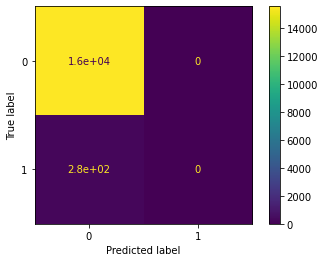

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15574
           1       0.00      0.00      0.00       275

    accuracy                           0.98     15849
   macro avg       0.49      0.50      0.50     15849
weighted avg       0.97      0.98      0.97     15849



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# 1. Regressão Logística
lg = LogisticRegression()
# lg = LogisticRegression(penalty='none', class_weight={0: 1, 1: 98.48}) # 100-1.52 

# treinamento
lg.fit(X_train, y_train)

# previsão (classificação)
lg_pred = lg.predict(X_test)
lg_prob = lg.predict_proba(X_test)

# avaliação
lg_acc = accuracy_score(y_test, lg_pred)
lg_roc = roc_auc_score(y_test, lg_prob[:, 1])
lg_cm = confusion_matrix(y_test, lg_pred)

print('Accuracy Logistic Regression: ', lg_acc)
print('ROC:', lg_roc)
print('Confusion Matrix:\n', lg_cm)

plot_confusion_matrix(lg, X_test, y_test)
plt.show()

print(metrics.classification_report(y_test, lg_pred))

Accuracy KNN:  0.9822070793109975
ROC: 0.5779870880371716
Confusion Matrix:
 [[15566     8]
 [  274     1]]


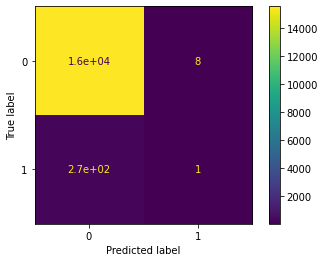

In [36]:
# 1. KNN
knn = KNeighborsClassifier()

# treinamento
knn.fit(X_train, y_train)

# previsão (classificação)
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)

# avaliação
knn_acc = accuracy_score(y_test, knn_pred)
knn_roc = roc_auc_score(y_test, knn_prob[:, 1])
knn_cm = confusion_matrix(y_test, knn_pred)

print('Accuracy KNN: ', knn_acc)
print('ROC:', knn_roc)
print('Confusion Matrix:\n', knn_cm)

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

Accuracy Árvore:  0.9673165499400593
ROC: 0.5247380832856626
Confusion Matrix:
 [[15311   263]
 [  255    20]]


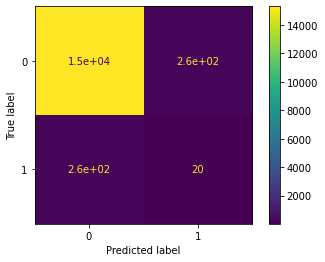

In [37]:
# Árvore de Decisão
arv = DecisionTreeClassifier()
# arv = DecisionTreeClassifier(class_weight={0: 1, 1: 98.5})

# treinamento
arv.fit(X_train, y_train)

# previsão (classificação)
arv_pred = arv.predict(X_test)
arv_prob = arv.predict_proba(X_test)

# avaliação
arv_acc = accuracy_score(y_test, arv_pred)
arv_roc = roc_auc_score(y_test, arv_prob[:, 1])
arv_cm = confusion_matrix(y_test, arv_pred)

print('Accuracy Árvore: ', arv_acc)
print('ROC:', arv_roc)
print('Confusion Matrix:\n', arv_cm)

plot_confusion_matrix(arv, X_test, y_test)
plt.show()

In [38]:
# MLP
mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
mlp_prob = mlp.predict_proba(X_test)

# avaliação
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_roc = roc_auc_score(y_test, mlp_prob[:, 1])
mlp_cm = confusion_matrix(y_test, mlp_pred)

Accuracy MLP:  0.9826487475550508
ROC: 0.6673777974946589
Confusion Matrix:
 [[15574     0]
 [  275     0]]


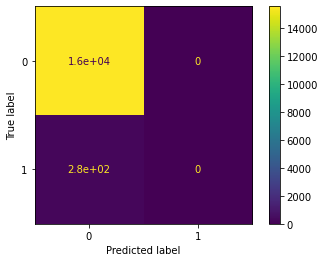

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15574
           1       0.00      0.00      0.00       275

    accuracy                           0.98     15849
   macro avg       0.49      0.50      0.50     15849
weighted avg       0.97      0.98      0.97     15849



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print('Accuracy MLP: ', mlp_acc)
print('ROC:', mlp_roc)
print('Confusion Matrix:\n', mlp_cm)

plot_confusion_matrix(mlp, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, mlp_pred))

Accuracy Random Forest:  0.979557069846678
ROC: 0.7002040697199294
Confusion Matrix:
 [[15522    52]
 [  272     3]]


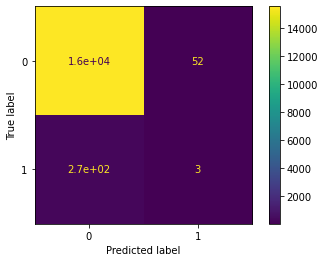

In [40]:
# 4. Random Forest
rf = RandomForestClassifier()
# rf = RandomForestClassifier(class_weight={0: 1, 1: 98.5})

# treinamento
rf.fit(X_train, y_train)

# previsão
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)

# avaliação
rf_acc = accuracy_score(y_test, rf_pred)
rf_roc = roc_auc_score(y_test, rf_prob[:, 1])
rf_cm = confusion_matrix(y_test, rf_pred)

print('Accuracy Random Forest: ', rf_acc)
print('ROC:', rf_roc)
print('Confusion Matrix:\n', rf_cm)

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

Accuracy XGBoost:  0.9826487475550508
ROC: 0.8242562779457603
Confusion Matrix:
 [[15574     0]
 [  275     0]]


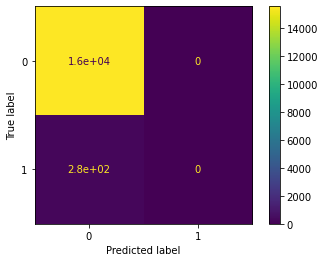

In [41]:
# 5. XGBoost
xgb = XGBClassifier()
# xgb = XGBClassifier(scale_pos_weight=98.5)

# treinamento
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)

# avaliação
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_roc = roc_auc_score(y_test, xgb_prob[:, 1])
xgb_cm = confusion_matrix(y_test, xgb_pred)

print('Accuracy XGBoost: ', xgb_acc)
print('ROC:', xgb_roc)
print('Confusion Matrix:\n', xgb_cm)

plot_confusion_matrix(xgb, X_test, y_test)
plt.show()

#### Qual foi o melhor modelo nessa análise prévia?

Essa não é a forma mais adequada.

Precisamos, antes de tudo, realizar a validação cruzada com uma grid de hiper parâmetros e usar os dados de teste ao final para comparar os modelos.


O que podemos fazer é criar ponderações para penalizar a classificação na classe dominante. 


## Parte 2 - Otimização dos parâmetros com validação cruzada e grid search

### Grid Search com Validação Cruzada 


In [42]:
## Grid Search - busca de parâmetros 
## Deve-se realizar a grid search com a validação cruzada, pois testa-se em vários conjuntos de dados
#### Exemplo com Random Forest
## Definindo os parâmetros
parametros_rf = {'n_estimators': [30, 100, 500], 'max_depth': [3, 4, 5, 10]}

gs_clf = GridSearchCV(RandomForestClassifier(class_weight={0: 1, 1: 98.5}), scoring='roc_auc',param_grid=parametros_rf, n_jobs=-1, cv=5)
clf = gs_clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print('Random Forest ROC:', score)
print('Melhor param:', clf.best_params_)

Random Forest ROC: 0.8205845406680131
Melhor param: {'max_depth': 5, 'n_estimators': 500}


Accuracy Random Forest:  0.6489999369045366
ROC: 0.8205845406680131
Confusion Matrix:
 [[10055  5519]
 [   44   231]]


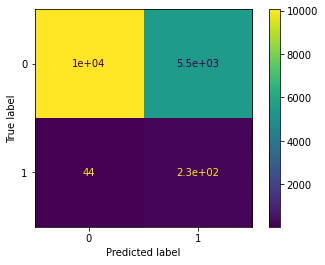

              precision    recall  f1-score   support

           0       1.00      0.65      0.78     15574
           1       0.04      0.84      0.08       275

    accuracy                           0.65     15849
   macro avg       0.52      0.74      0.43     15849
weighted avg       0.98      0.65      0.77     15849



In [43]:
# Podemos visualizar accuracy e a matriz de confusão
# previsão
clf_pred = clf.predict(X_test)
clf_prob = clf.predict_proba(X_test)

# avaliação
clf_acc = accuracy_score(y_test, clf_pred)
clf_roc = roc_auc_score(y_test, clf_prob[:, 1])
clf_cm = confusion_matrix(y_test, clf_pred)

print('Accuracy Random Forest: ', clf_acc)
print('ROC:', clf_roc)
print('Confusion Matrix:\n', clf_cm)

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

print(metrics.classification_report(y_test, clf_pred))

In [44]:
## Testar com vários modelos
print('Iniciando grid search e validação cruzada')

names = [
        "Regressão Logística",
        "Random Forest",
        "XGBoost",
        ]

classificadores = [
    LogisticRegression(class_weight={0: 1, 1: 98.5}),
    RandomForestClassifier(class_weight={0: 1, 1: 98.5}),
    XGBClassifier(scale_pos_weight=98.5),
]

parametros = [
            {'penalty': ['none','l1', 'l2', 'elasticnet']},
            {'n_estimators': [50, 100, 500],
                'max_depth': [3, 5, 10]},
            {'n_estimators': [50, 100, 500],
                'max_depth': [3, 5, 10]},
              ]

escores = []
melhores_params = []
modelos = []

for name, classificador, params in zip(names, classificadores, parametros):
    print('-------------------------------------------------------------------')
    print('classificador:', name)
    print('parametros:', params)

    gs_clf = GridSearchCV(classificador, scoring='roc_auc',param_grid=params, n_jobs=-1, cv=5)
    clf = gs_clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    escores.append(score)
    melhores_params.append(clf.best_params_)
    modelos.append(clf)

    print('{} score: {}'.format(name, score))
    print('Melhores params', clf.best_params_)

Iniciando grid search e validação cruzada
-------------------------------------------------------------------
classificador: Regressão Logística
parametros: {'penalty': ['none', 'l1', 'l2', 'elasticnet']}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Regressão Logística score: 0.8197065038467375
Melhores params {'penalty': 'l2'}
-------------------------------------------------------------------
classificador: Random Forest
parametros: {'n_estimators': [50, 100, 500], 'max_depth': [3, 5, 10]}
Random Forest score: 0.8237861470749618
Melhores params {'max_depth': 5, 'n_estimators': 500}
-------------------------------------------------------------------
classificador: XGBoost
parametros: {'n_estimators': [50, 100, 500], 'max_depth': [3, 5, 10]}
XGBoost score: 0.8232047585136066
Melhores params {'max_depth': 3, 'n_estimators': 50}


Accuracy Reg. Logística:  0.6117105180137548
ROC: 0.8197065038467375
Confusion Matrix:
 [[9460 6114]
 [  40  235]]
Accuracy XGBoost:  0.6387784718278756
ROC: 0.8237861470749618
Confusion Matrix:
 [[9889 5685]
 [  40  235]]
Regressão Logística


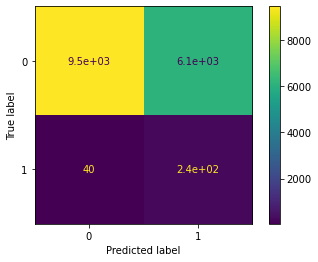

              precision    recall  f1-score   support

           0       1.00      0.61      0.75     15574
           1       0.04      0.85      0.07       275

    accuracy                           0.61     15849
   macro avg       0.52      0.73      0.41     15849
weighted avg       0.98      0.61      0.74     15849

XGBoost


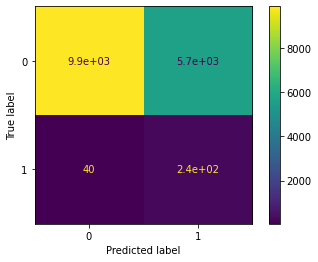

              precision    recall  f1-score   support

           0       1.00      0.63      0.78     15574
           1       0.04      0.85      0.08       275

    accuracy                           0.64     15849
   macro avg       0.52      0.74      0.43     15849
weighted avg       0.98      0.64      0.76     15849



In [45]:
# Podemos visualizar accuracy e a matriz de confusão
# previsão
lg_pred = modelos[0].predict(X_test)
lg_prob = modelos[0].predict_proba(X_test)
xgb_pred = modelos[1].predict(X_test)
xgb_prob = modelos[1].predict_proba(X_test)

# avaliação
lg_acc = accuracy_score(y_test, lg_pred)
lg_roc = roc_auc_score(y_test, lg_prob[:, 1])
lg_cm = confusion_matrix(y_test, lg_pred)

xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_roc = roc_auc_score(y_test, xgb_prob[:, 1])
xgb_cm = confusion_matrix(y_test, xgb_pred)

print('Accuracy Reg. Logística: ', lg_acc)
print('ROC:', lg_roc)
print('Confusion Matrix:\n', lg_cm)

print('Accuracy XGBoost: ', xgb_acc)
print('ROC:', xgb_roc)
print('Confusion Matrix:\n', xgb_cm)

print('Regressão Logística')
plot_confusion_matrix(modelos[0], X_test, y_test)
plt.show()

print(metrics.classification_report(y_test, lg_pred))

print('XGBoost')
plot_confusion_matrix(modelos[1], X_test, y_test)
plt.show()

print(metrics.classification_report(y_test, xgb_pred))

### O que se pode fazer a partir de agora?

* Redução da dimensionalidade:
    * PCA
    * Autoencoder

* Otimização de hiper-parâmetros com algoritmos evolucionários

* Feature selection

* Tentar rebalancear os dados:
    * Under-sampling
    * Over-sampling
